In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Leer dataset de entrenamiento
data_path = '../data_sintetica/clientes_sinteticos.csv'
df = pd.read_csv(data_path)
df.head()

,id_cliente,fecha_primera_compra,fecha_ultima_compra,pais,canal,frecuencia_compra,recencia_dias,ticket_promedio_usd,monto_total_usd,num_categorias,devoluciones_pct,cupon_uso_pct,nps,rfm_recency,rfm_frequency,rfm_monetary,aov,intensidad,lealtad,cliente_activo
0,C-000001,2025-02-11 23:43:12.981849,2025-04-22 23:43:12.981849,Perú,email,7,117,10.34,113.74,17,2.28,3.46,20.0,117,7,113.74,10.34,0.96,2.12,0
1,C-000002,2022-05-01 23:43:12.981849,2025-07-30 23:43:12.981849,Perú,orgánico,2,18,43.46,217.28,10,6.52,21.46,95.0,18,2,217.28,43.46,11.44,3.33,1
2,C-000003,2024-03-09 23:43:12.981849,2025-07-10 23:43:12.981849,Perú,móvil,8,38,31.30,281.67,13,15.28,18.91,95.0,38,8,281.67,31.30,7.22,1.44,1
3,C-000004,2024-08-17 23:43:12.981849,2025-05-12 23:43:12.981849,Perú,web,1,97,28.70,57.39,4,7.29,7.25,-32.0,97,1,57.39,28.70,0.59,2.00,0
4,C-000005,2025-06-11 23:43:12.981849,2025-06-19 23:43:12.981849,Perú,web,5,59,20.08,140.57,14,9.11,4.45,-13.0,59,5,140.57,20.08,2.34,2.33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            20000 non-null  object 
 1   fecha_primera_compra  20000 non-null  object 
 2   fecha_ultima_compra   20000 non-null  object 
 3   pais                  20000 non-null  object 
 4   canal                 20000 non-null  object 
 5   frecuencia_compra     20000 non-null  int64  
 6   recencia_dias         20000 non-null  int64  
 7   ticket_promedio_usd   20000 non-null  float64
 8   monto_total_usd       20000 non-null  float64
 9   num_categorias        20000 non-null  int64  
 10  devoluciones_pct      20000 non-null  float64
 11  cupon_uso_pct         20000 non-null  float64
 12  nps                   18064 non-null  float64
 13  rfm_recency           20000 non-null  int64  
 14  rfm_frequency         20000 non-null  int64  
 15  rfm_monetary       

In [3]:
#Preprocesamiento par PCA
df_pca = df.drop(columns=['id_cliente'])
scaler =StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

ValueError: could not convert string to float: '2025-02-11 23:43:12.981849'

In [4]:
#Aplicar el PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#crear DataFrame con componentes y densidades
df_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_result['densidad'] = np.exp(-((df_pca_result['PC1'])**2 + (df_pca_result['PC2'])**2))

In [5]:
print("Varianza explicada por cada componente: ", pca.explained_variance_ratio_ )
print("Varianza total explicada: ", pca.explained_variance_ratio_.sum())

Varianza explicada por cada componente:  [0.20243006 0.17482735]
Varianza total explicada:  0.3772574134096685


In [6]:
np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_)

array([0.20243006, 0.37725741, 0.54237502, 0.70013809, 0.85232366,
       1.        ])

In [5]:
#Guardar los resultados en excel
output_excel = os.path.join(BASE_DIR, 'resultado de modelos', 'pca_resultados_logistica.xlsx')
os.makedirs(os.path.dirname(output_excel), exist_ok=True)
df_pca_result.to_excel(output_excel, index=False)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

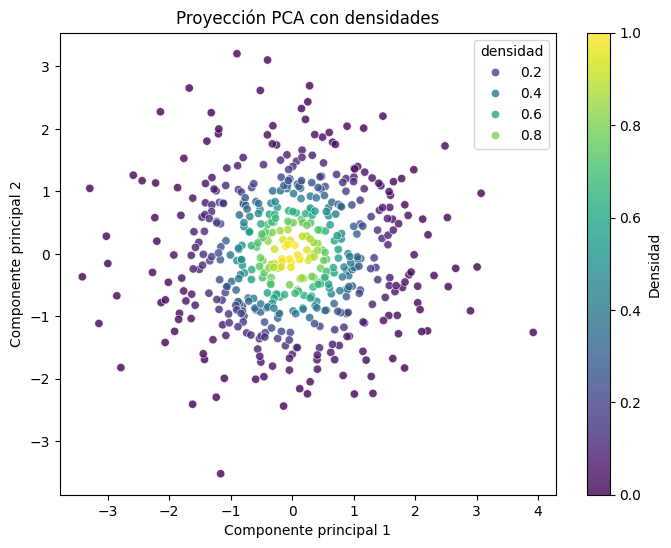

In [10]:
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(data=df_pca_result, x ='PC1', y='PC2',
                          hue='densidad', palette='viridis', alpha=0.8)
plt.title('Proyección PCA con densidades')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(scatter.collections[0], label='Densidad')
plt.tight_layout